In [ ]:
!pip install matplotlib
import matplotlib

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Instalar librerías (sólo la primera vez)
!python -m pip install pymysql
!pip install cssselect
!pip install BeautifulSoup4
!pip install lxml
!pip install selenium

In [ ]:
!pip install requests

In [ ]:

import pymysql
import pandas as pd
import datetime
import urllib.request, urllib.parse, urllib.error
import json
from pandas.io.json import json_normalize
from urllib.parse import urlencode, urlparse, parse_qs
from lxml.html import fromstring
from requests import get
from bs4 import BeautifulSoup
import requests
import re
import time

import pymysql
import pandas as pd
import datetime
import urllib.request, urllib.parse, urllib.error
import json
from pandas.io.json import json_normalize
from urllib.parse import urlencode, urlparse, parse_qs
from lxml.html import fromstring
from requests import get
from bs4 import BeautifulSoup
import requests
import re
import time

from selenium import webdriver 
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.chrome.options import Options
import time


In [ ]:
# importar keys para OmDB API (la key la pueden obtener acá http://www.omdbapi.com/apikey.aspx)
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+"e0dd629a" # el segundo numero es la api key

# Open database connection
connection = pymysql.connect(host="mel.analytics.cl", user="jcabeza",password="09jcabeza40",db="Cineplanet_Chile", port=33060)

# Esta es la consulta que devuelve las peliculas de los últimos 6 meses
query = "SELECT PEL_ID, PEL_NOMBRE_COMERCIAL, STR_TO_DATE(PEL_FECHA_ESTRENO, '%m/%d/%Y') AS Fecha FROM DIM_PELICULA WHERE  STR_TO_DATE(PEL_FECHA_ESTRENO, '%m/%d/%Y') >= DATE_SUB(NOW(), INTERVAL 6 MONTH);"
peliculas = pd.read_sql(query, connection)


In [ ]:
print(peliculas.shape)
peliculas.tail()

(108, 3)


,PEL_ID,PEL_NOMBRE_COMERCIAL,Fecha
103,4389,NADANDO POR UN SUEÑO,2019-05-09
104,4390,POKMON: DETECTIVE PIKACHU,2019-05-09
105,4391,ROCKETMAN,2019-05-30
106,4392,UGLYDOLLS: EXTRAORDINARIAMENTE FEOS,2019-05-16
107,4393,X-MEN: DARK PHOENIX,2019-06-06


In [ ]:
  # Funciones para lectura y guardado de omdb api

  #Funcion para imprimir los datos de OMBDAPI Json
  def print_json(json_data):
      list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
                 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
                 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID','Rated']
      print("-"*50)
      for k in list_keys:
          if k in list(json_data.keys()):
              print(f"{k}: {json_data[k]}")
      print("-"*50)

  # Funcion para buscar pelicula por su nombre    
  def search_movie(title):
      if len(title) < 1 or title=='quit': 
          print("Goodbye now...")
          return None
      elif (title=='NO_ENCONTRADO') | (title=='Cinema +'):
          print("Goodbye now...")
          return None
      try:
          url = serviceurl + urllib.parse.urlencode({'t': title})+apikey
          print(f'Retrieving the data of "{title}" now... ')
          uh = urllib.request.urlopen(url)
          data = uh.read()
          json_data=json.loads(data)
          return(json_data)

          #if json_data['Response']=='True':
          #    print_json(json_data)

          #else:
          #    print("Error encountered: ",json_data['Error'])

      except urllib.error.URLError as e:
          print(f"ERROR: {e.reason}")
          return None

  # Función para buscar link en wikipedia de la película (Este código nos permite entregar un nombre en español en la query y que devuelva el link a la página de wikipedia de la película)
  def search_wikipedia_link(title):
    raw = get("https://www.google.com/search?q="+title+" película wikipedia").text
    page = fromstring(raw)
    resultados = True
    while resultados is True:
      paginas = []
      #time.sleep(1)
      for result in page.cssselect(".r a"):
        url = result.get("href")
        if url.startswith("/url?"):
          url = parse_qs(urlparse(url).query)['q']
          paginas.append(str(url[0]))
        if len(paginas)>1:
          wikipedia_page = paginas[0]
          resultados = False
          return(wikipedia_page)

  # Función en que utilizamos el link de wikipedia para encontrar el título original de la película
  def search_original_title(link):
    url = requests.get(link).text
    #Parse the HTML from our URL into the BeautifulSoup parse tree format
    soup = BeautifulSoup(url, "html.parser")
    #print(soup.prettify()) #Si queremos revisar el html de la página ejecutar esto
    # busca cabecera cine de Wikipedia (tiene el titulo original de la película)
    original_title = soup.find('th', {'class': 'cabecera cine'}).text
    return(original_title)

  def find_title(query):
    url = "https://www.google.com/search?q="+query+" movie wikipedia"
    chromedriver = "C:\webdrivers\chromedriver.exe"
    chrome_options = Options() 
    chrome_options.add_argument("--headless")
    driver = webdriver.Chrome(executable_path=chromedriver,chrome_options=chrome_options) 
    driver.get(url)
    driver.find_element_by_class_name('LC20lb').click()
    name = driver.find_element_by_tag_name('th').text  
    #time.sleep(5)
    #print(name)
    driver.close()
    return name

In [ ]:


titulos=[]
i=0
for pel in peliculas['PEL_NOMBRE_COMERCIAL']:
  print(i+1,".",pel)
  try:
    titulo_original = find_title(pel)
  except:
    titulo_original = 'NO_ENCONTRADO'
  print("titulo original: ",titulo_original)
  titulos.append(titulo_original)
  i=i+1

1 . ATAQUE SUBMARINO
titulo original:  NO_ENCONTRADO
2 . BTS WORLD TOUR: LOVE YOURSELF IN SEOUL
titulo original:  NO_ENCONTRADO
3 . BUMBLEBEE
titulo original:  NO_ENCONTRADO
4 . DESTRUCCIÓN
titulo original:  NO_ENCONTRADO
5 . DRAGON BALL SUPER BROLY
titulo original:  NO_ENCONTRADO
6 . EL GRAN TERREMOTO
titulo original:  NO_ENCONTRADO
7 . MÁQUINAS MORTALES
titulo original:  NO_ENCONTRADO
8 . NO QUIERO SER TU HERMANO
titulo original:  NO_ENCONTRADO
9 . ATENTADO EN EL ESTADIO
titulo original:  NO_ENCONTRADO
10 . BATTLE ANGEL: LA ULTIMA GUERRERA
titulo original:  NO_ENCONTRADO
11 . CÓMO ENTRENAR A TU DRAGÓN 3
titulo original:  NO_ENCONTRADO
12 . CICLO ANIME: LA TUMBA DE LAS LUCIERNAGAS
titulo original:  NO_ENCONTRADO
13 . CICLO ANIME: PAPRIKA DETECTIVE DE LOS SUEÑOS
titulo original:  NO_ENCONTRADO
14 . CINE ARTE CLÁSICO: TERCIOPELO AZUL
titulo original:  NO_ENCONTRADO
15 . CREED 2: DEFENDIENDO EL LEGADO
titulo original:  NO_ENCONTRADO
16 . DEMONIO DE MEDIANOCHE
titulo original:  NO_ENCONTR

c:\users\juan cabeza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:70: DeprecationWarning: use options instead of chrome_options


23 . NACIDO PARA SER REY
titulo original:  NO_ENCONTRADO
24 . AMIGOS POR SIEMPRE
titulo original:  NO_ENCONTRADO
25 . CICLO ANIME: AKIRA
titulo original:  NO_ENCONTRADO
26 . CINE ARTE CLÁSICO: LA NARANJA MECÁNICA
titulo original:  NO_ENCONTRADO
27 . CINE ARTE: ETERNO RESPLANDOR DE UNA MENTE SIN RDO
titulo original:  NO_ENCONTRADO
28 . ¿PODRÁS PERDONARME?
titulo original:  NO_ENCONTRADO
29 . BEAUTIFUL BOY: SIEMPRE SERÁS MI HIJO
titulo original:  NO_ENCONTRADO
30 . CAPITANA MARVEL
titulo original:  NO_ENCONTRADO
31 . CICLO ANIME: EL VIAJE DE CHIHIRO
titulo original:  NO_ENCONTRADO
32 . CICLO ANIME: THE END OF EVANGELION
titulo original:  NO_ENCONTRADO
33 . EL MANICOMIO: LA CUNA DEL TERROR
titulo original:  NO_ENCONTRADO
34 . EL VICEPRESIDENTE, MÁS ALLÁ DEL PODER
titulo original:  NO_ENCONTRADO
35 . FELIZ DÍA DE TU MUERTE 2
titulo original:  NO_ENCONTRADO
36 . GREEN BOOK: UNA AMISTAD SIN FRONTERAS
titulo original:  NO_ENCONTRADO
37 . LA GRAN AVENTURA LEGO 2
titulo original:  NO_ENCONTRADO

In [ ]:
titulos = ['Brightburn', 'Aladdin', 'Rocketman', 'X-MEN: DARK PHOENIX', 'Mi amigo alexis', 'Godzilla: King of the Monsters', 'EL CUENTO DE LAS COMADREJAS']

In [ ]:
# Construir el DataFrame
data_movies = pd.DataFrame(columns=['Actors','Country','Director','Genre','Language','Metascore','Plot','Production','Released','Runtime','Title','Year','imdbRating','imdbVotes'])
not_founds=[]
for tit in titulos:
  if (tit!='NO_ENCONTRADO') & (tit!='Cinema +'):
    pelicula = search_movie(tit)
    try:
      bla = pd.DataFrame({'Actors': [pelicula['Actors']]
                 ,'Country':[pelicula['Country']]
                 ,'Director' : [pelicula['Director']]
                 ,'Genre':[pelicula['Genre']]
                 ,'Language':[pelicula['Language']]
                 ,'Metascore':[pelicula['Metascore']]
                 ,'Plot':[pelicula['Plot']]
                 ,'Production':[pelicula['Production']]
                 ,'Released':[pelicula['Released']]
                 ,'Runtime':[pelicula['Runtime']]
                 ,'Title':[pelicula['Title']]
                 ,'Year':[pelicula['Year']]
                 ,'imdbRating':[pelicula['imdbRating']]
                 ,'imdbVotes':[pelicula['imdbVotes']]
                 })
      data_movies = data_movies.append(bla)
    except:
      not_founds.append(tit)
      #print('Pelicula No Encontrada: ', tit)

data_movies.index = range(0,data_movies.shape[0])
print(not_founds)
print(data_movies.shape)
data_movies.to_csv('data.csv')
data_movies.head()

Retrieving the data of "Brightburn" now... 
Retrieving the data of "Aladdin" now... 
Retrieving the data of "Rocketman" now... 
Retrieving the data of "X-MEN: DARK PHOENIX" now... 
Retrieving the data of "Mi amigo alexis" now... 
Retrieving the data of "Godzilla: King of the Monsters" now... 
Retrieving the data of "EL CUENTO DE LAS COMADREJAS" now... 
['X-MEN: DARK PHOENIX', 'EL CUENTO DE LAS COMADREJAS']
(5, 14)


,Actors,Country,Director,Genre,Language,Metascore,Plot,Production,Released,Runtime,Title,Year,imdbRating,imdbVotes
0,"Elizabeth Banks, David Denman, Jackson A. Dunn...",USA,David Yarovesky,"Horror, Sci-Fi",English,44,What if a child from another world crash-lande...,Screen Gems,24 May 2019,90 min,Brightburn,2019,6.5,"13,497"
1,"Scott Weinger, Robin Williams, Linda Larkin, J...",USA,"Ron Clements, John Musker","Animation, Adventure, Comedy, Family, Fantasy,...",English,86,A kindhearted street urchin and a power-hungry...,Walt Disney Pictures,25 Nov 1992,90 min,Aladdin,1992,8.0,"317,790"
2,"Harland Williams, Jessica Lundy, William Sadle...",USA,Stuart Gillard,"Comedy, Family, Sci-Fi",English,N/A,Fred Z. Randall is a geeky spacecraft designer...,Walt Disney Productions,10 Oct 1997,95 min,RocketMan,1997,5.9,"8,411"
3,"Ivan Alvarez de Araya, Nathalia Aragonese, Mar...",Chile,Alejandro Fernández Almendras,"Adventure, Comedy, Drama, Family, Sport",Spanish,N/A,N/A,N/A,30 May 2019,N/A,Mi Amigo Alexis,2019,N/A,N/A
4,"Raymond Burr, Takashi Shimura, Momoko Kôchi, A...","USA, Japan","Ishirô Honda, Terry O. Morse","Action, Horror, Sci-Fi","English, Japanese",60,"A 400-foot (122-meter) dinosaur-like beast, aw...",Vestron Video,27 Apr 1956,80 min,"Godzilla, King of the Monsters!",1956,6.6,"6,254"


In [ ]:
# Separacion de los valores dentro de la columna de genero

import numpy as np
from itertools import chain

# Funcion para retornar lista con los valores separados

def chainer(s):
    return list(chain.from_iterable(s.str.split(', ')))

# numero de separaciones de cada valores en la columna de Genero
lens = data_movies['Genre'].str.split(', ').map(len)

# Repito los valores las cantidad de veces que tengan diferentes valores en la columna

dataframe_genero = pd.DataFrame({'Actors': np.repeat(data_movies['Actors'], lens),
                    'Country': np.repeat(data_movies['Country'], lens),
                    'Director': np.repeat(data_movies['Director'], lens),
                    'Genre': chainer(data_movies['Genre']),
                    'Language': np.repeat(data_movies['Language'], lens),
                    'Metascore': np.repeat(data_movies['Metascore'], lens),
                    'Plot': np.repeat(data_movies['Plot'], lens),
                    'Production': np.repeat(data_movies['Production'], lens),
                    'Released': np.repeat(data_movies['Released'], lens),
                    'Runtime': np.repeat(data_movies['Runtime'], lens),
                    'Title': np.repeat(data_movies['Title'], lens),
                    'Year': np.repeat(data_movies['Year'], lens),
                    'imdbRating': np.repeat(data_movies['imdbRating'], lens),
                    'imdbVotes': np.repeat(data_movies['imdbVotes'], lens)
                    })

dataframe_genero.shape

(20, 14)

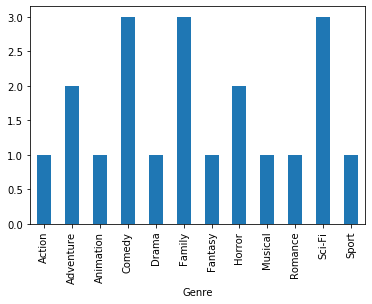

In [ ]:
grafico = dataframe_genero.groupby(['Genre']).size()
grafico.plot.bar()

#from google.colab import files
#plt.savefig("plot_genre.png")
#files.download("plot_genre.png")

In [ ]:
titulos = ['Aquaman', 'Instant Family', 'Robin Hood', 'Widows', 'Hunter Killer',
       'BTS World Tour: Love Yourself in Seoul', 'Bumblebee', 'The Shining',
       'Girl, Interrupted', 'The Doors', 'Wildling',
       'Dragon Ball Super: Broly', 'Lizzie', 'Deadpool 2', 'Hell Fest',
       'The House That Jack Built', 'Mortal Engines',
       'No Quiero Ser Tu Hermano', 'Spider-Man: Into the Spider-Verse',
       'Final Score', 'Alita: Battle Angel', 'How to Train Your Dragon',
       'Blue Velvet', 'Creed II', 'Night of the Demons',
       'Mary Poppins Returns', 'Escape Room', 'Glass', 'Second Act',
       'The Favourite', 'The Mule', 'The Kid Who Would Be King',
       'The American Film Institute Presents: TV or Not TV?',
       'Eternal Sunshine of the Spotless Mind', 'Can You Ever Forgive Me?',
       'Beautiful', 'Captain Marvel', 'The World According to Dick Cheney',
       'Happy Death Day 2U', 'Green Book', 'The Lego Movie 2: The Second Part',
       'The Prodigy', 'A Dogs Way Home', 'Replicas', 'Suspiria', 'Charming',
       'Five Feet Apart', 'After', 'Pet Sematary', 'Angel-A', 'Brazil',
       'Gummo', 'Mulholland Drive', 'Climax', 'Dumbo', 'Flow',
       'La misma carne, la misma sangre', 'The Outcasts',
       'On the Basis of Sex', 'Mary Queen of Scots', 'Marilyn', 'Marilyn',
       'Us', 'Shazam!', 'Cold Pursuit', 'The Aftermath', 'Avengers: Endgame',
       'Tenkû no shiro Rapyuta: Promotion', 'Nineteen Eighty-Four',
       'Lost Highway', 'Cola de mono', 'The Queens Corgi',
       'Pokémon Detective Pikachu', 'Hellboy', 'The Curse of La Llorona',
       'Fighting with My Family', 'Imagen', 'Brightburn', 'El cuento de las comadrejas']

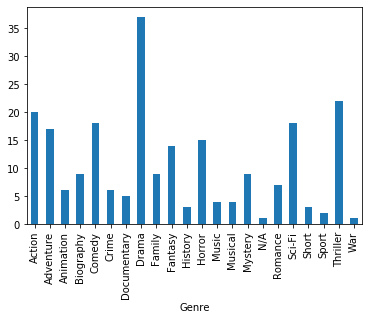